In [98]:
#Imports 
import pickle
import datetime

import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean

In [2]:
print('Running other notebooks: Preparing data..\r', end = '')
%run "Load and prepare data.ipynb"
print('Running other notebooks: Defining particle tracking class..', end = '')
%run "Define particle tracking class.ipynb"
print('  ..done.')

Running other notebooks: Defining particle tracking class..  ..done.


### Load sea ice trajectory
DL from https://data.meereisportal.de/

Maps for reference:


##### B1: *2019P143*

- From near 85 N Laptev sector to far down Greenland coast (ice-to-ocean, I think) 
- https://data.meereisportal.de/maps/buoys/P/2019P143_map.png


In [99]:
buoy = '2019P143'
fn_globkey = f'data/{buoy}_data/*_proc.csv'
fn = glob.glob(fn_globkey)[0]
print(fn)

data/2019P143_data/2019P143_300234010077180_proc.csv


In [100]:
b = pd.read_csv(fn)

In [101]:
start_index = 4000

start_lon = b['longitude (deg)'].iloc[start_index]
start_lat = b['latitude (deg)'].iloc[start_index]
start_date = pd.to_datetime(b.time.iloc[start_index])

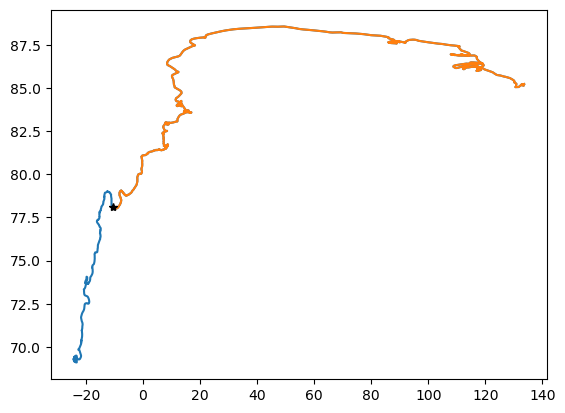

In [102]:

fig, ax = plt.subplots()
ax.plot(b['longitude (deg)'], b['latitude (deg)'])
ax.plot(b['longitude (deg)'][:start_index], b['latitude (deg)'][:start_index])
ax.plot(start_lon, start_lat, '*k')

#### Backtrack

In [52]:
import warnings
warnings.simplefilter("ignore")

In [95]:
IC_dict = {'D':D, 
              'lat0':start_lat, 
              'lon0':start_lon, 
           'time0':start_date, 
           'MASK':MASK, 'interp_method':'linear', 'end_criteria':'ABC' }
    
# Set up object, compute the trajectory, and save to TRAJS
P = ice_particle(IC_dict)
P.backtrack()

Setting up object ..
 ..done.
HIT OPEN WATER! () step 653 (26 Oct 2018) - 2367.2 km ..


In [96]:
crs = ccrs.Stereographic(central_latitude=80.0, central_longitude=0.0, false_easting=0.0, 
                          false_northing=0.0, true_scale_latitude=None, globe=None)

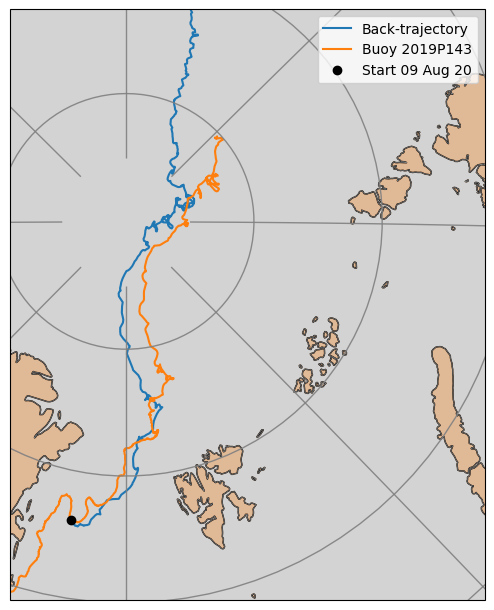

In [97]:
plt.close('all')
fig = plt.figure(figsize = [6.45, 7.67])
ax = fig.add_subplot(111, projection=crs)

ax.coastlines()
ax.add_feature(cfeature.LAND, color = 'tab:orange', alpha = 0.3)
ax.add_feature(cfeature.COASTLINE, color = 'gray', lw = 0.5)
ax.set_extent([-45, 125, 60, 60])

ax.set_xlim(-511665, 1579472)
ax.set_ylim(-546114, 2055926)
ax.set_facecolor('lightgray')



Plat, Plon = P.ease2_to_latlon.transform(P.x, P.y)

datestr = num2date(date2num(P.time0)).strftime('%d %b %y')

ax.plot(Plon, Plat, transform = ccrs.PlateCarree(), label = 'Back-trajectory')
ax.plot(b['longitude (deg)'], b['latitude (deg)'], transform = ccrs.PlateCarree(), label = 'Buoy %s'%buoy)
ax.plot(Plon[0], Plat[0], 'ok', transform = ccrs.PlateCarree(), label = 'Start %s'%datestr)

gls = ax.gridlines(draw_labels=False, crs=ccrs.PlateCarree(), lw=1, color="gray",
        y_inline=True, xlocs=range(-180,180,45), ylocs=range(0,90,5), alpha = 0.9,  ylim=87.5, )
ax.legend()